# 
This text file has info of hits for a sample of 10k 10kev kaons fired forward 1mm into the 16th layer of the Ecal.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
from scipy import optimize
from scipy.optimize import curve_fit
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

In [59]:
# import data from file
sim_data = np.genfromtxt('/Users/chris/Desktop/10kev_10k_kaons_allinfo.txt',delimiter=',')
sim_layers = data[1:,0]
sim_edep = data[1:,1]
sim_IDs = data[1:,3]

# define total and average energy for each layer
etotal = sum(edep)

# cribbed
def merge(list1, list2):
     
    merged_list = tuple(zip(list1, list2))
    return merged_list
     

sim_coordinate_list = merge(sim_layers, sim_edep)

# crib this code from the internet
y_values_by_x = {}
for x, y in sim_coordinate_list:
    y_values_by_x.setdefault(x, []).append(y)

sim_average_y_by_x = {k: sum(v)/len(v) for k, v in y_values_by_x.items()}
sim_total_y_by_x = {k: sum(v) for k, v in y_values_by_x.items()}

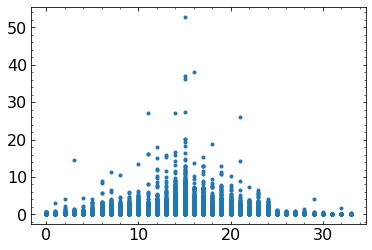

In [56]:
plt.plot(sim_layers,sim_edep,linestyle='',marker='.')

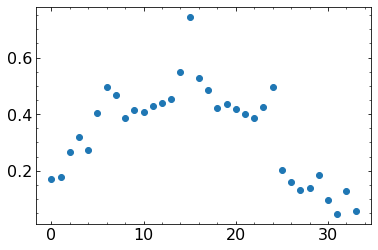

In [60]:
plt.plot(sim_average_y_by_x.keys(),sim_average_y_by_x.values(),linestyle='',marker='o')

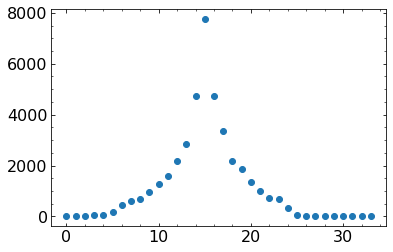

In [61]:
plt.plot(sim_total_y_by_x.keys(),sim_total_y_by_x.values(),linestyle='',marker='o')

Redo everything with Rec Hits

In [82]:
# import data from file
data = np.genfromtxt('/Users/chris/Desktop/RECHITinfo_10kevkaons.txt',delimiter=',')
data_asstr = np.genfromtxt('/Users/chris/Desktop/RECHITinfo_10kevkaons.txt',delimiter=',',dtype=str)
layers = data[1:,0].astype(int)
xpos = data[1:,1]
ypos = data[1:,2]
edep = data[1:,3]
isnoise = data_asstr[1:,4]
IDs = data[1:,5]

print(data[1])

# define total and average energy for each layer
etotal = sum(edep)

# cribbed
def merge(list1, list2):
     
    merged_list = tuple(zip(list1, list2))
    return merged_list
     

coordinate_list = merge(layers, edep)

# crib this code from the internet
y_values_by_x = {}
for x, y in coordinate_list:
    y_values_by_x.setdefault(x, []).append(y)

average_y_by_x = {k: sum(v)/len(v) for k, v in y_values_by_x.items()}
total_y_by_x = {k: sum(v) for k, v in y_values_by_x.items()}

[ 1.80000000e+01  1.21428576e+01 -2.10320454e+01  3.59562421e+00
             nan  4.79763485e-02  3.37903874e+08]
['False' 'False' 'False' ... 'False' 'False' 'False']


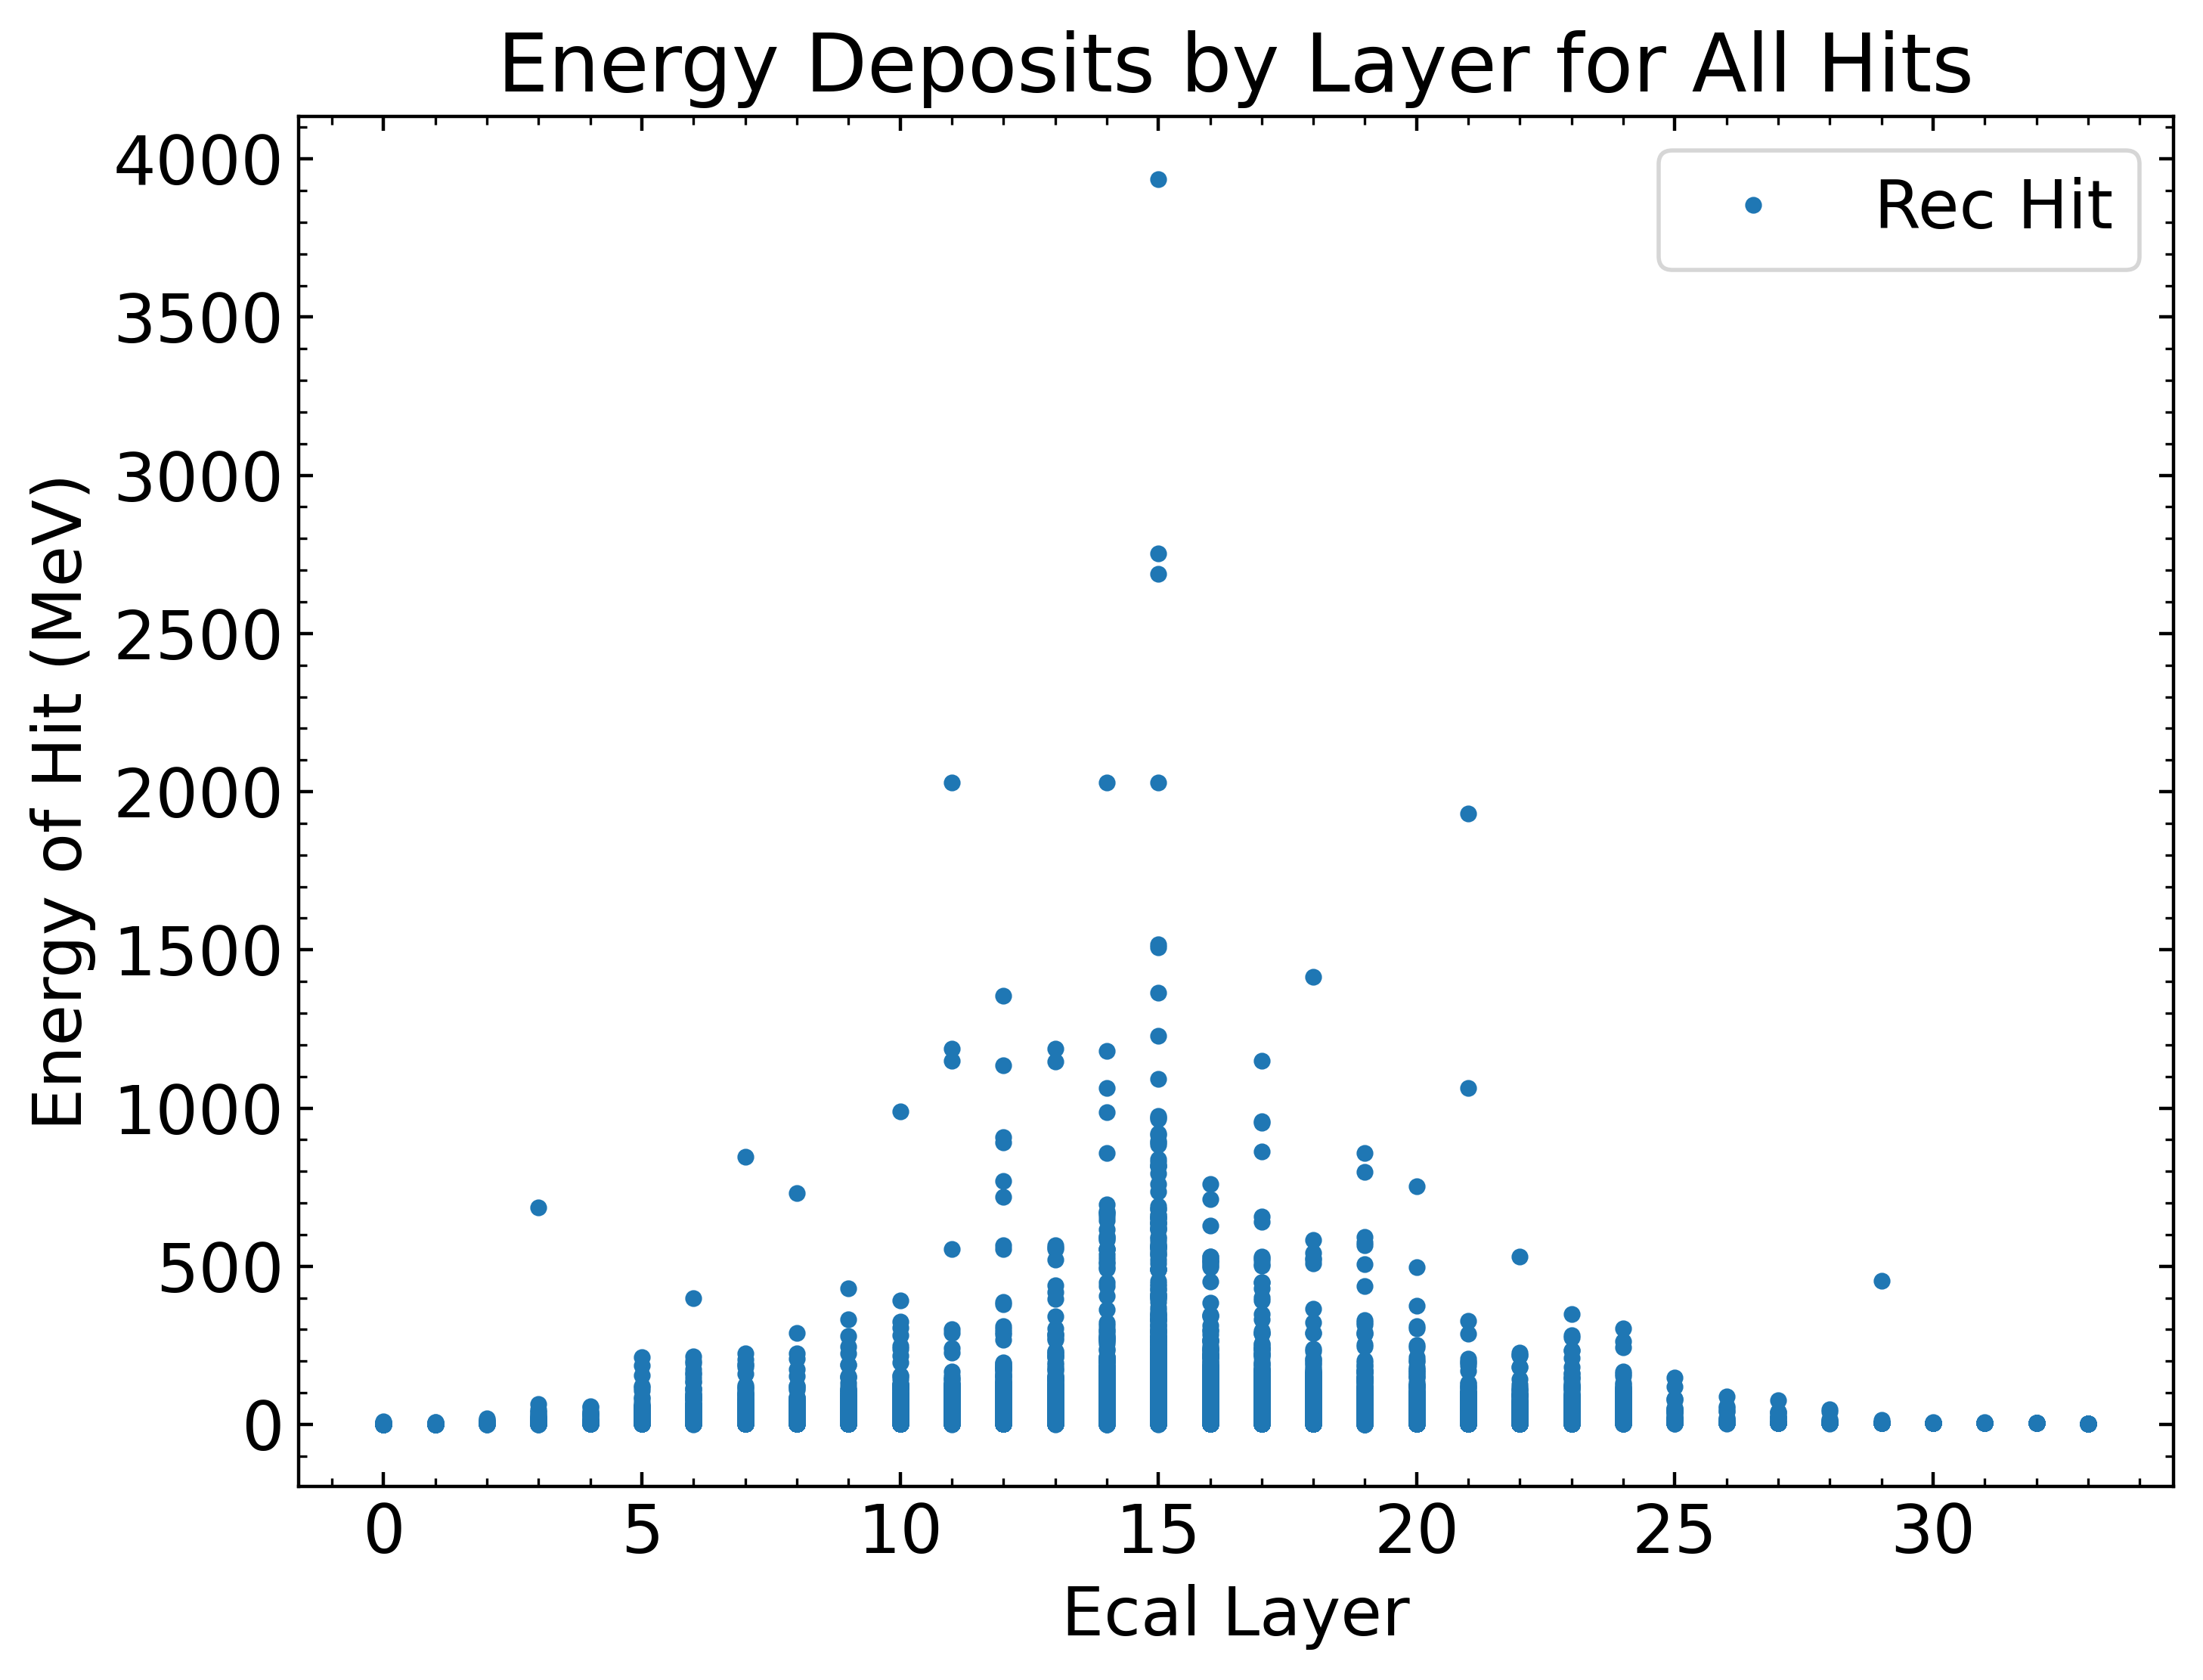

In [221]:
plt.figure(figsize=(8,6),dpi=400)
plt.plot(layers,edep,linestyle='',marker='.',label='Rec Hit')
plt.xlabel("Ecal Layer")
plt.ylabel("Energy of Hit (MeV)")
plt.title(r"Energy Deposits by Layer for All Hits")
plt.legend()

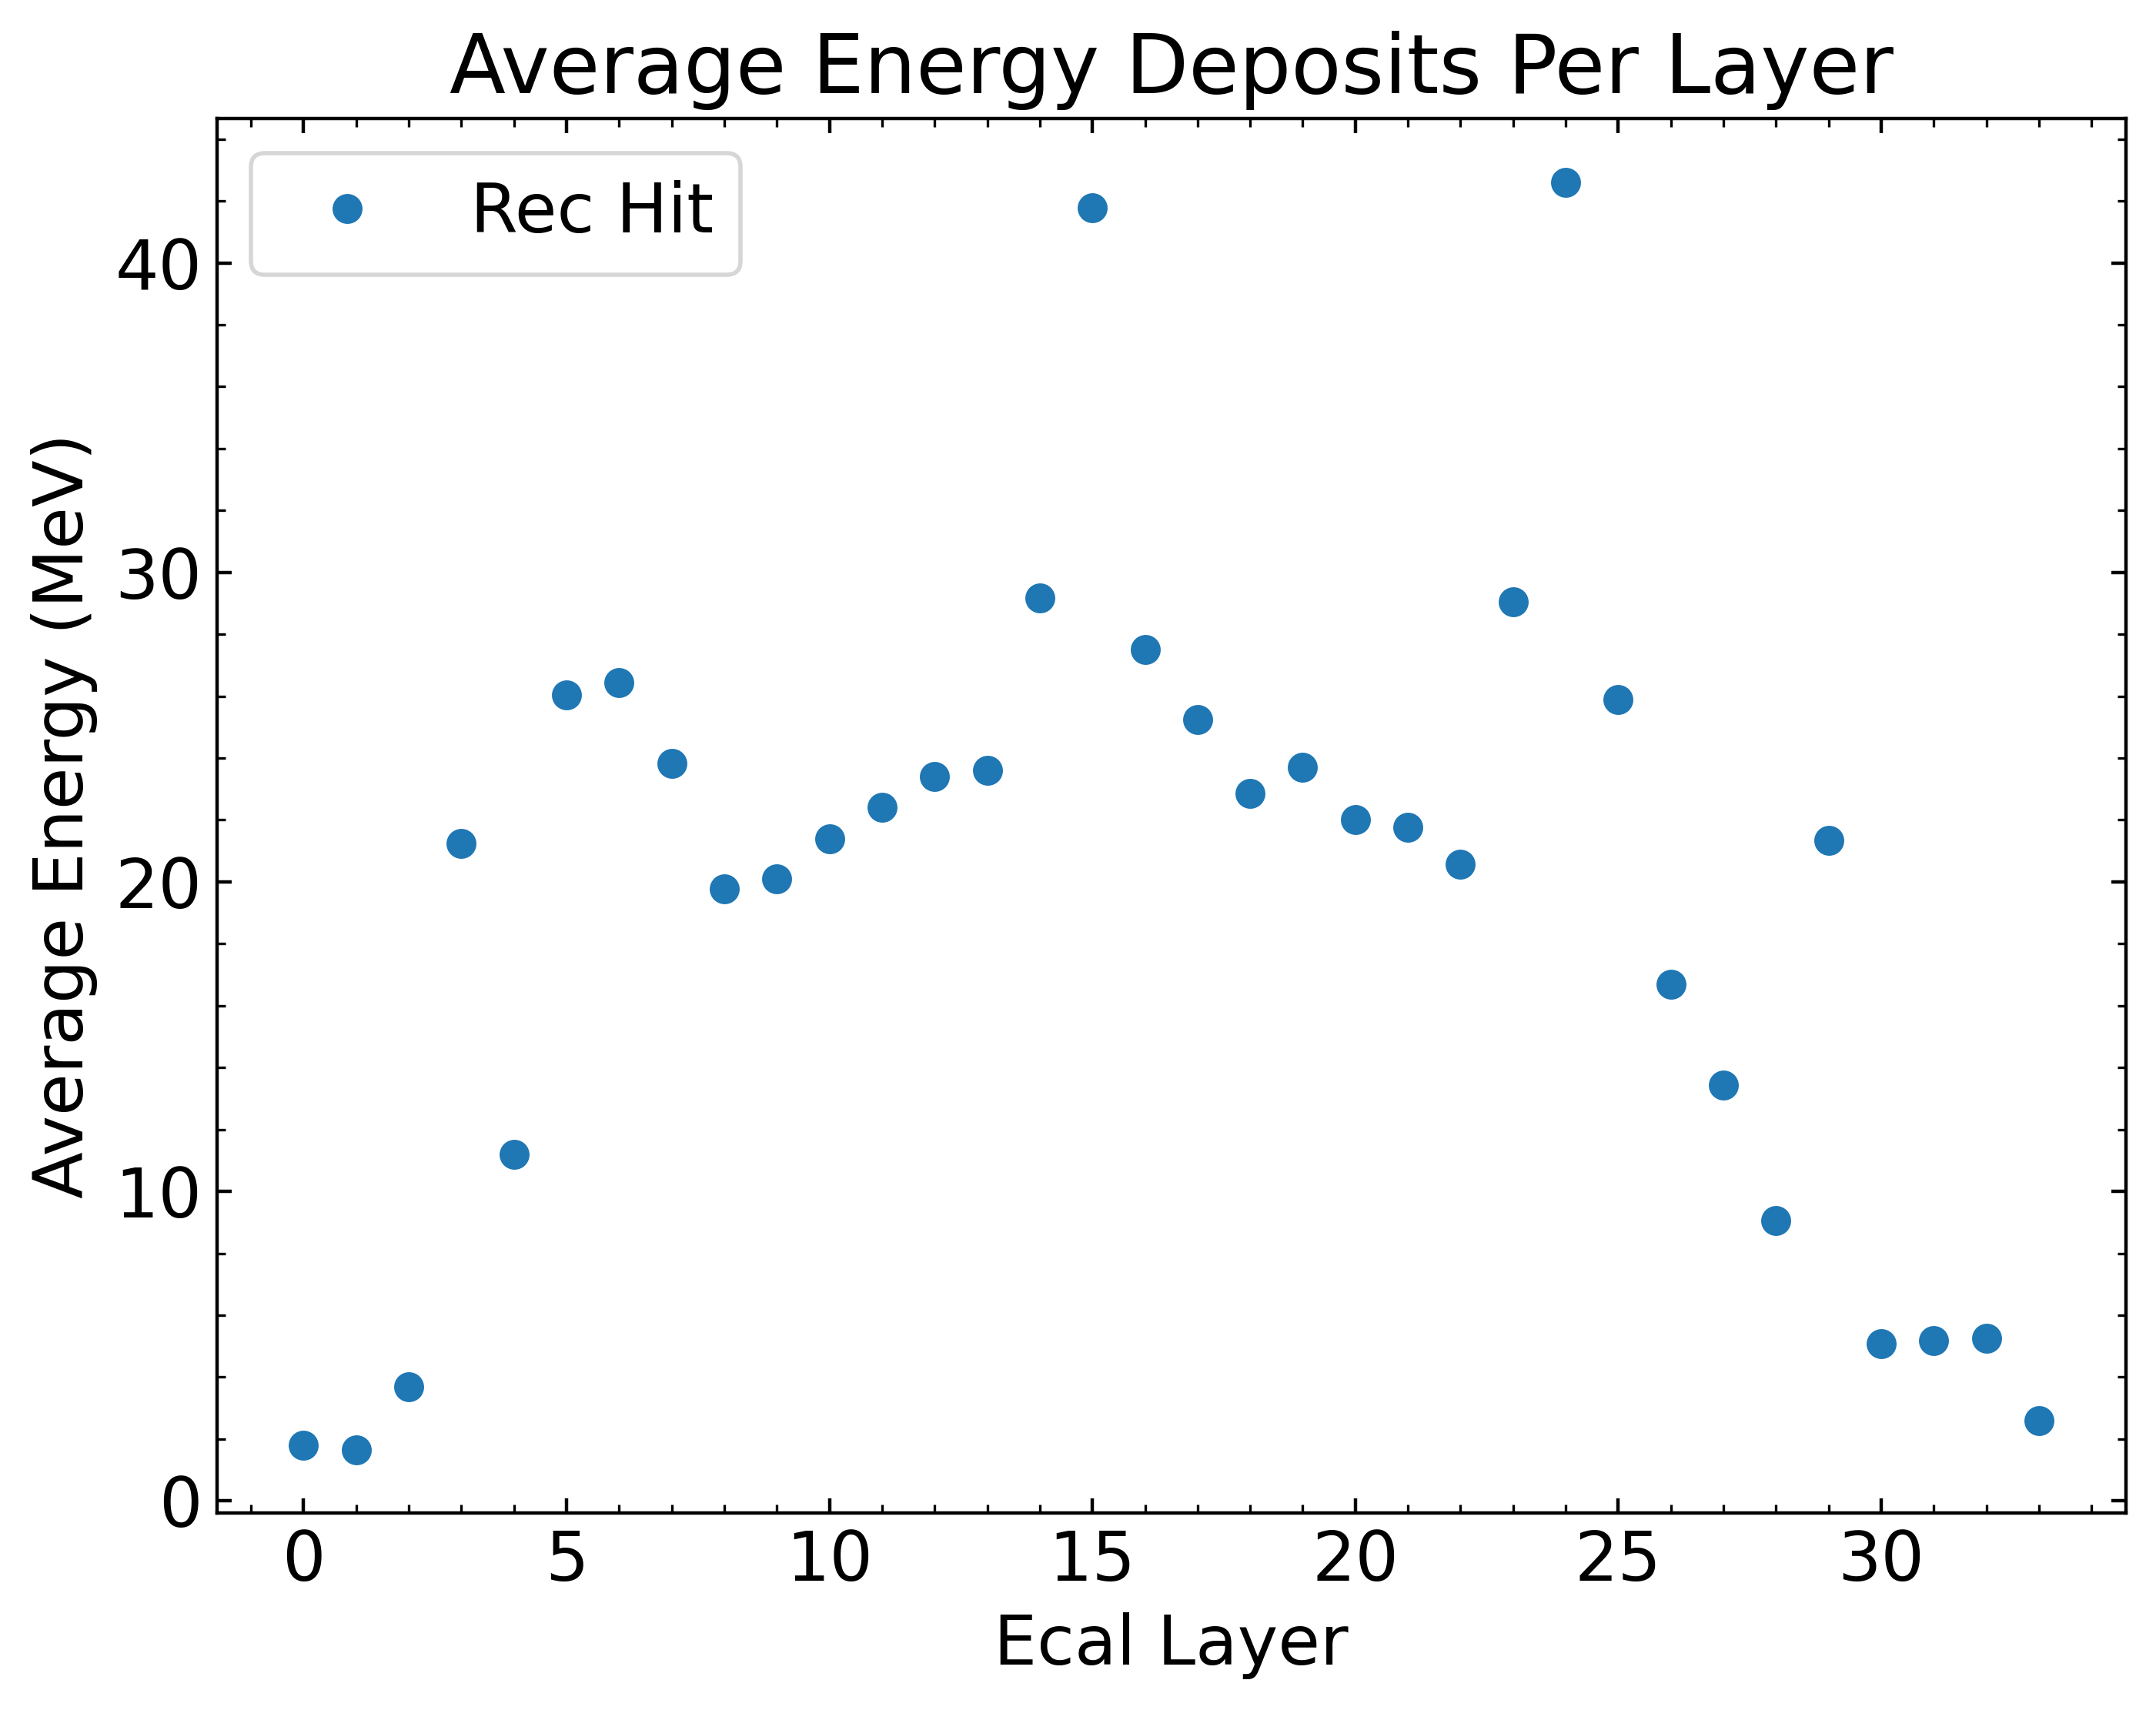

In [224]:
plt.figure(figsize=(8,6),dpi=400)
plt.plot(average_y_by_x.keys(),average_y_by_x.values(),linestyle='',marker='o',label="Rec Hit")
plt.xlabel("Ecal Layer")
plt.ylabel("Average Energy (MeV)")
plt.title(r"Average Energy Deposits Per Layer")
plt.legend(loc=2)

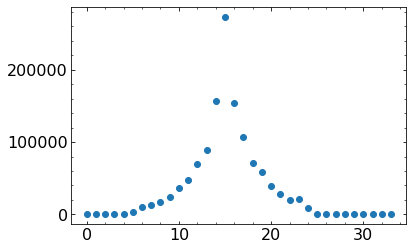

In [65]:
plt.plot(total_y_by_x.keys(),total_y_by_x.values(),linestyle='',marker='o')

In [243]:
# figure out whether the crazy high energy hits are noise or not
numgreaterthan500mev = 0
for i in range(len(isnoise)):
    if edep[i]>500:
        numgreaterthan500mev += 1

print(numgreaterthan500mev/len(isnoise)*100)


0.297004132231405


In [181]:
# import data from file
pdgids = np.genfromtxt('/Users/chris/Desktop/pdgIDs.txt',delimiter=',')

In [239]:
print(pdgids)

numhits = len(pdgids)
print(numhits)
muplus = 0
eminus = 0
eplus = 0
gamma = 0
n0 = 0
piplus = 0
piminus = 0 
pplus = 0
others = 0

for i in range(numhits):
    if pdgids[i] == -13:
        muplus += 1
     #   pdgids[i] = None
    elif pdgids[i] == 11:
        eminus += 1
      #  pdgids[i] = None
    elif pdgids[i] == -11:
        eplus += 1
       # pdgids[i] = None
    elif pdgids[i] == 22:
        gamma += 1
    elif pdgids[i] == 2112:
        n0 += 1
    elif pdgids[i] == 211:
        piplus += 1
    elif pdgids[i] == 2212:
        pplus += 1
    elif pdgids[i] == -211:
        piminus += 1 
    else:
        others += 1

        
# newlist = pdgids[pdgids != np.array(None)]
# print(len(newlist))

print(muplus)
print(eminus)
print(eplus)
print("gamma"+str(gamma))
print("n0"+str(n0))
print("piplus "+ str(piplus))
print("piminus "+ str(piminus))
print("pplus "+str(pplus))
print("others "+str(others))
print(numhits-muplus-eminus-eplus)

[2112.   11. 2112. ...   11.   11.   nan]
93736
33801
33721
15672
gamma1115
n02901
piplus 5590
piminus 157
pplus 352
others 427
10542


In [142]:
print(numhits-muplus)

59935


mu percent 0.36059784927882566e- 0.3597443884953486eplus0.16719296748314416piplus 0.05963557224545532


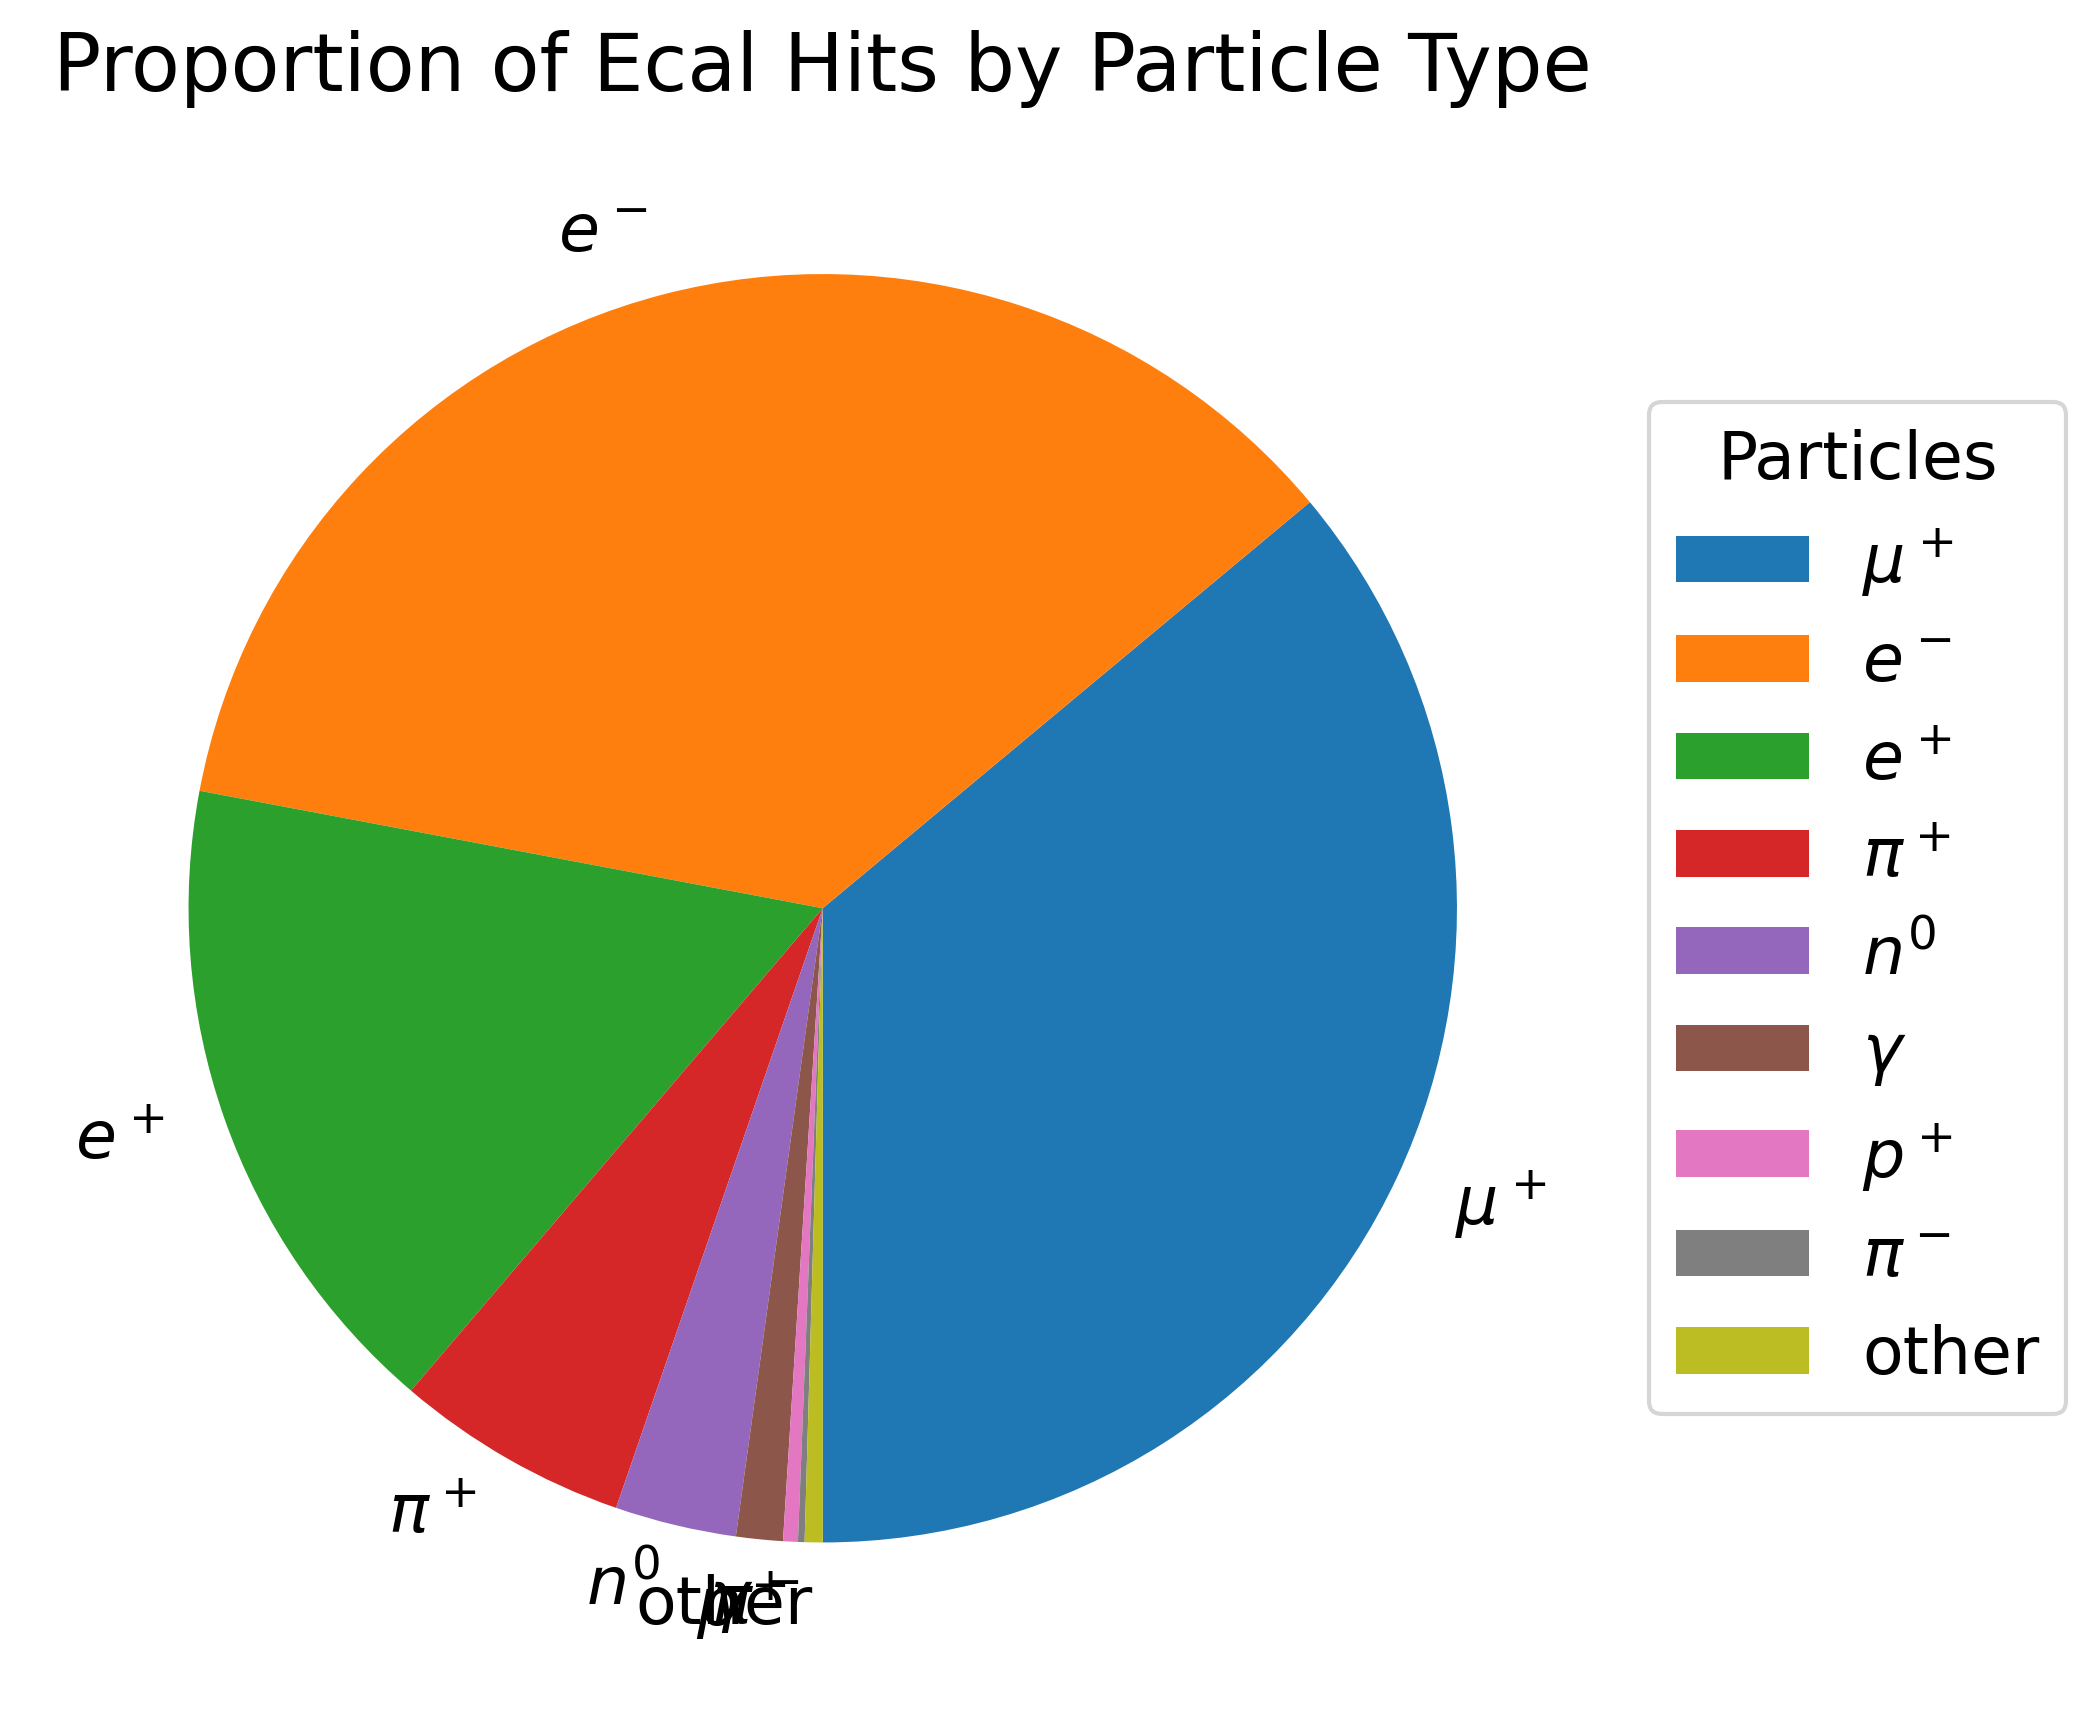

In [240]:
# 33801 Mu+
# 33721 e- 
# 15672 e+ 

# 5590 pi +

# 2901 neutron

# 1115 gamma


# 157 piminus
# 352 proton
# 427 others

particles = [r'$\mu^+$',r'$e^-$',r'$e^+$',r'$\pi^+$',r'$n^0$',
             r'$\gamma$', r'$p^+$', r'$\pi^-$', 'other' ]

data = [33801,33721,15672,5590,2901,1115,352,157,427]

fig, ax = plt.subplots(figsize =(10, 7),dpi=300)
wedges, texts = ax.pie(data,labels=particles,startangle=-90)
ax.legend(wedges, particles,
          title ="Particles",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Proportion of Ecal Hits by Particle Type")
print("mu percent "+str(muplus/numhits)+'e- '+str(eminus/numhits)+'eplus'+str(eplus/numhits)+'piplus '+str(piplus/numhits))

In [111]:
a = np.arange(1,10)
print(a)
b = np.delete(a,0)
print(b)

[1 2 3 4 5 6 7 8 9]
[2 3 4 5 6 7 8 9]


In [195]:
import particle
from particle import PDGID as pd
print(pd(13))

<PDGID: 13>


In [237]:
a = np.arange(1,10)
print(a-5)

[-4 -3 -2 -1  0  1  2  3  4]


In [234]:
names = ['10kev_1k_forwardkaons_16thlayer+428.3.root','10kev_1k_forwardkaons_16thlayer+428.40144928.root','10kev_1k_forwardkaons_16thlayer+428.50289855.root','10kev_1k_forwardkaons_16thlayer+428.60434783.root','10kev_1k_forwardkaons_16thlayer+428.7057971.root','10kev_1k_forwardkaons_16thlayer+428.80724638.root','10kev_1k_forwardkaons_16thlayer+428.90869565.root','10kev_1k_forwardkaons_16thlayer+429.01014493.root','10kev_1k_forwardkaons_16thlayer+429.1115942.root','10kev_1k_forwardkaons_16thlayer+429.21304348.root','10kev_1k_forwardkaons_16thlayer+429.31449275.root','10kev_1k_forwardkaons_16thlayer+429.41594203.root','10kev_1k_forwardkaons_16thlayer+429.5173913.root','10kev_1k_forwardkaons_16thlayer+429.61884058.root','10kev_1k_forwardkaons_16thlayer+429.72028986.root','10kev_1k_forwardkaons_16thlayer+429.82173913.root','10kev_1k_forwardkaons_16thlayer+429.92318841.root','10kev_1k_forwardkaons_16thlayer+430.02463768.root','10kev_1k_forwardkaons_16thlayer+430.12608696.root','10kev_1k_forwardkaons_16thlayer+430.22753623.root','10kev_1k_forwardkaons_16thlayer+430.32898551.root','10kev_1k_forwardkaons_16thlayer+430.43043478.root','10kev_1k_forwardkaons_16thlayer+430.53188406.root','10kev_1k_forwardkaons_16thlayer+430.63333333.root','10kev_1k_forwardkaons_16thlayer+430.73478261.root','10kev_1k_forwardkaons_16thlayer+430.83623188.root','10kev_1k_forwardkaons_16thlayer+430.93768116.root','10kev_1k_forwardkaons_16thlayer+431.03913043.root','10kev_1k_forwardkaons_16thlayer+431.14057971.root','10kev_1k_forwardkaons_16thlayer+431.24202899.root','10kev_1k_forwardkaons_16thlayer+431.34347826.root','10kev_1k_forwardkaons_16thlayer+431.44492754.root','10kev_1k_forwardkaons_16thlayer+431.54637681.root','10kev_1k_forwardkaons_16thlayer+431.64782609.root','10kev_1k_forwardkaons_16thlayer+431.74927536.root','10kev_1k_forwardkaons_16thlayer+431.85072464.root','10kev_1k_forwardkaons_16thlayer+431.95217391.root','10kev_1k_forwardkaons_16thlayer+432.05362319.root','10kev_1k_forwardkaons_16thlayer+432.15507246.root','10kev_1k_forwardkaons_16thlayer+432.25652174.root','10kev_1k_forwardkaons_16thlayer+432.35797101.root','10kev_1k_forwardkaons_16thlayer+432.45942029.root','10kev_1k_forwardkaons_16thlayer+432.56086957.root','10kev_1k_forwardkaons_16thlayer+432.66231884.root','10kev_1k_forwardkaons_16thlayer+432.76376812.root','10kev_1k_forwardkaons_16thlayer+432.86521739.root','10kev_1k_forwardkaons_16thlayer+432.96666667.root','10kev_1k_forwardkaons_16thlayer+433.06811594.root','10kev_1k_forwardkaons_16thlayer+433.16956522.root','10kev_1k_forwardkaons_16thlayer+433.27101449.root','10kev_1k_forwardkaons_16thlayer+433.37246377.root','10kev_1k_forwardkaons_16thlayer+433.47391304.root','10kev_1k_forwardkaons_16thlayer+433.57536232.root','10kev_1k_forwardkaons_16thlayer+433.67681159.root','10kev_1k_forwardkaons_16thlayer+433.77826087.root','10kev_1k_forwardkaons_16thlayer+433.87971014.root','10kev_1k_forwardkaons_16thlayer+433.98115942.root','10kev_1k_forwardkaons_16thlayer+434.0826087.root','10kev_1k_forwardkaons_16thlayer+434.18405797.root','10kev_1k_forwardkaons_16thlayer+434.28550725.root','10kev_1k_forwardkaons_16thlayer+434.38695652.root','10kev_1k_forwardkaons_16thlayer+434.4884058.root','10kev_1k_forwardkaons_16thlayer+434.58985507.root','10kev_1k_forwardkaons_16thlayer+434.69130435.root','10kev_1k_forwardkaons_16thlayer+434.79275362.root','10kev_1k_forwardkaons_16thlayer+434.8942029.root','10kev_1k_forwardkaons_16thlayer+434.99565217.root','10kev_1k_forwardkaons_16thlayer435.09710145.root','10kev_1k_forwardkaons_16thlayer+435.19855072.root','10kev_1k_forwardkaons_16thlayer+435.3.root'] 

Now work with this new file of the percentage of no hits

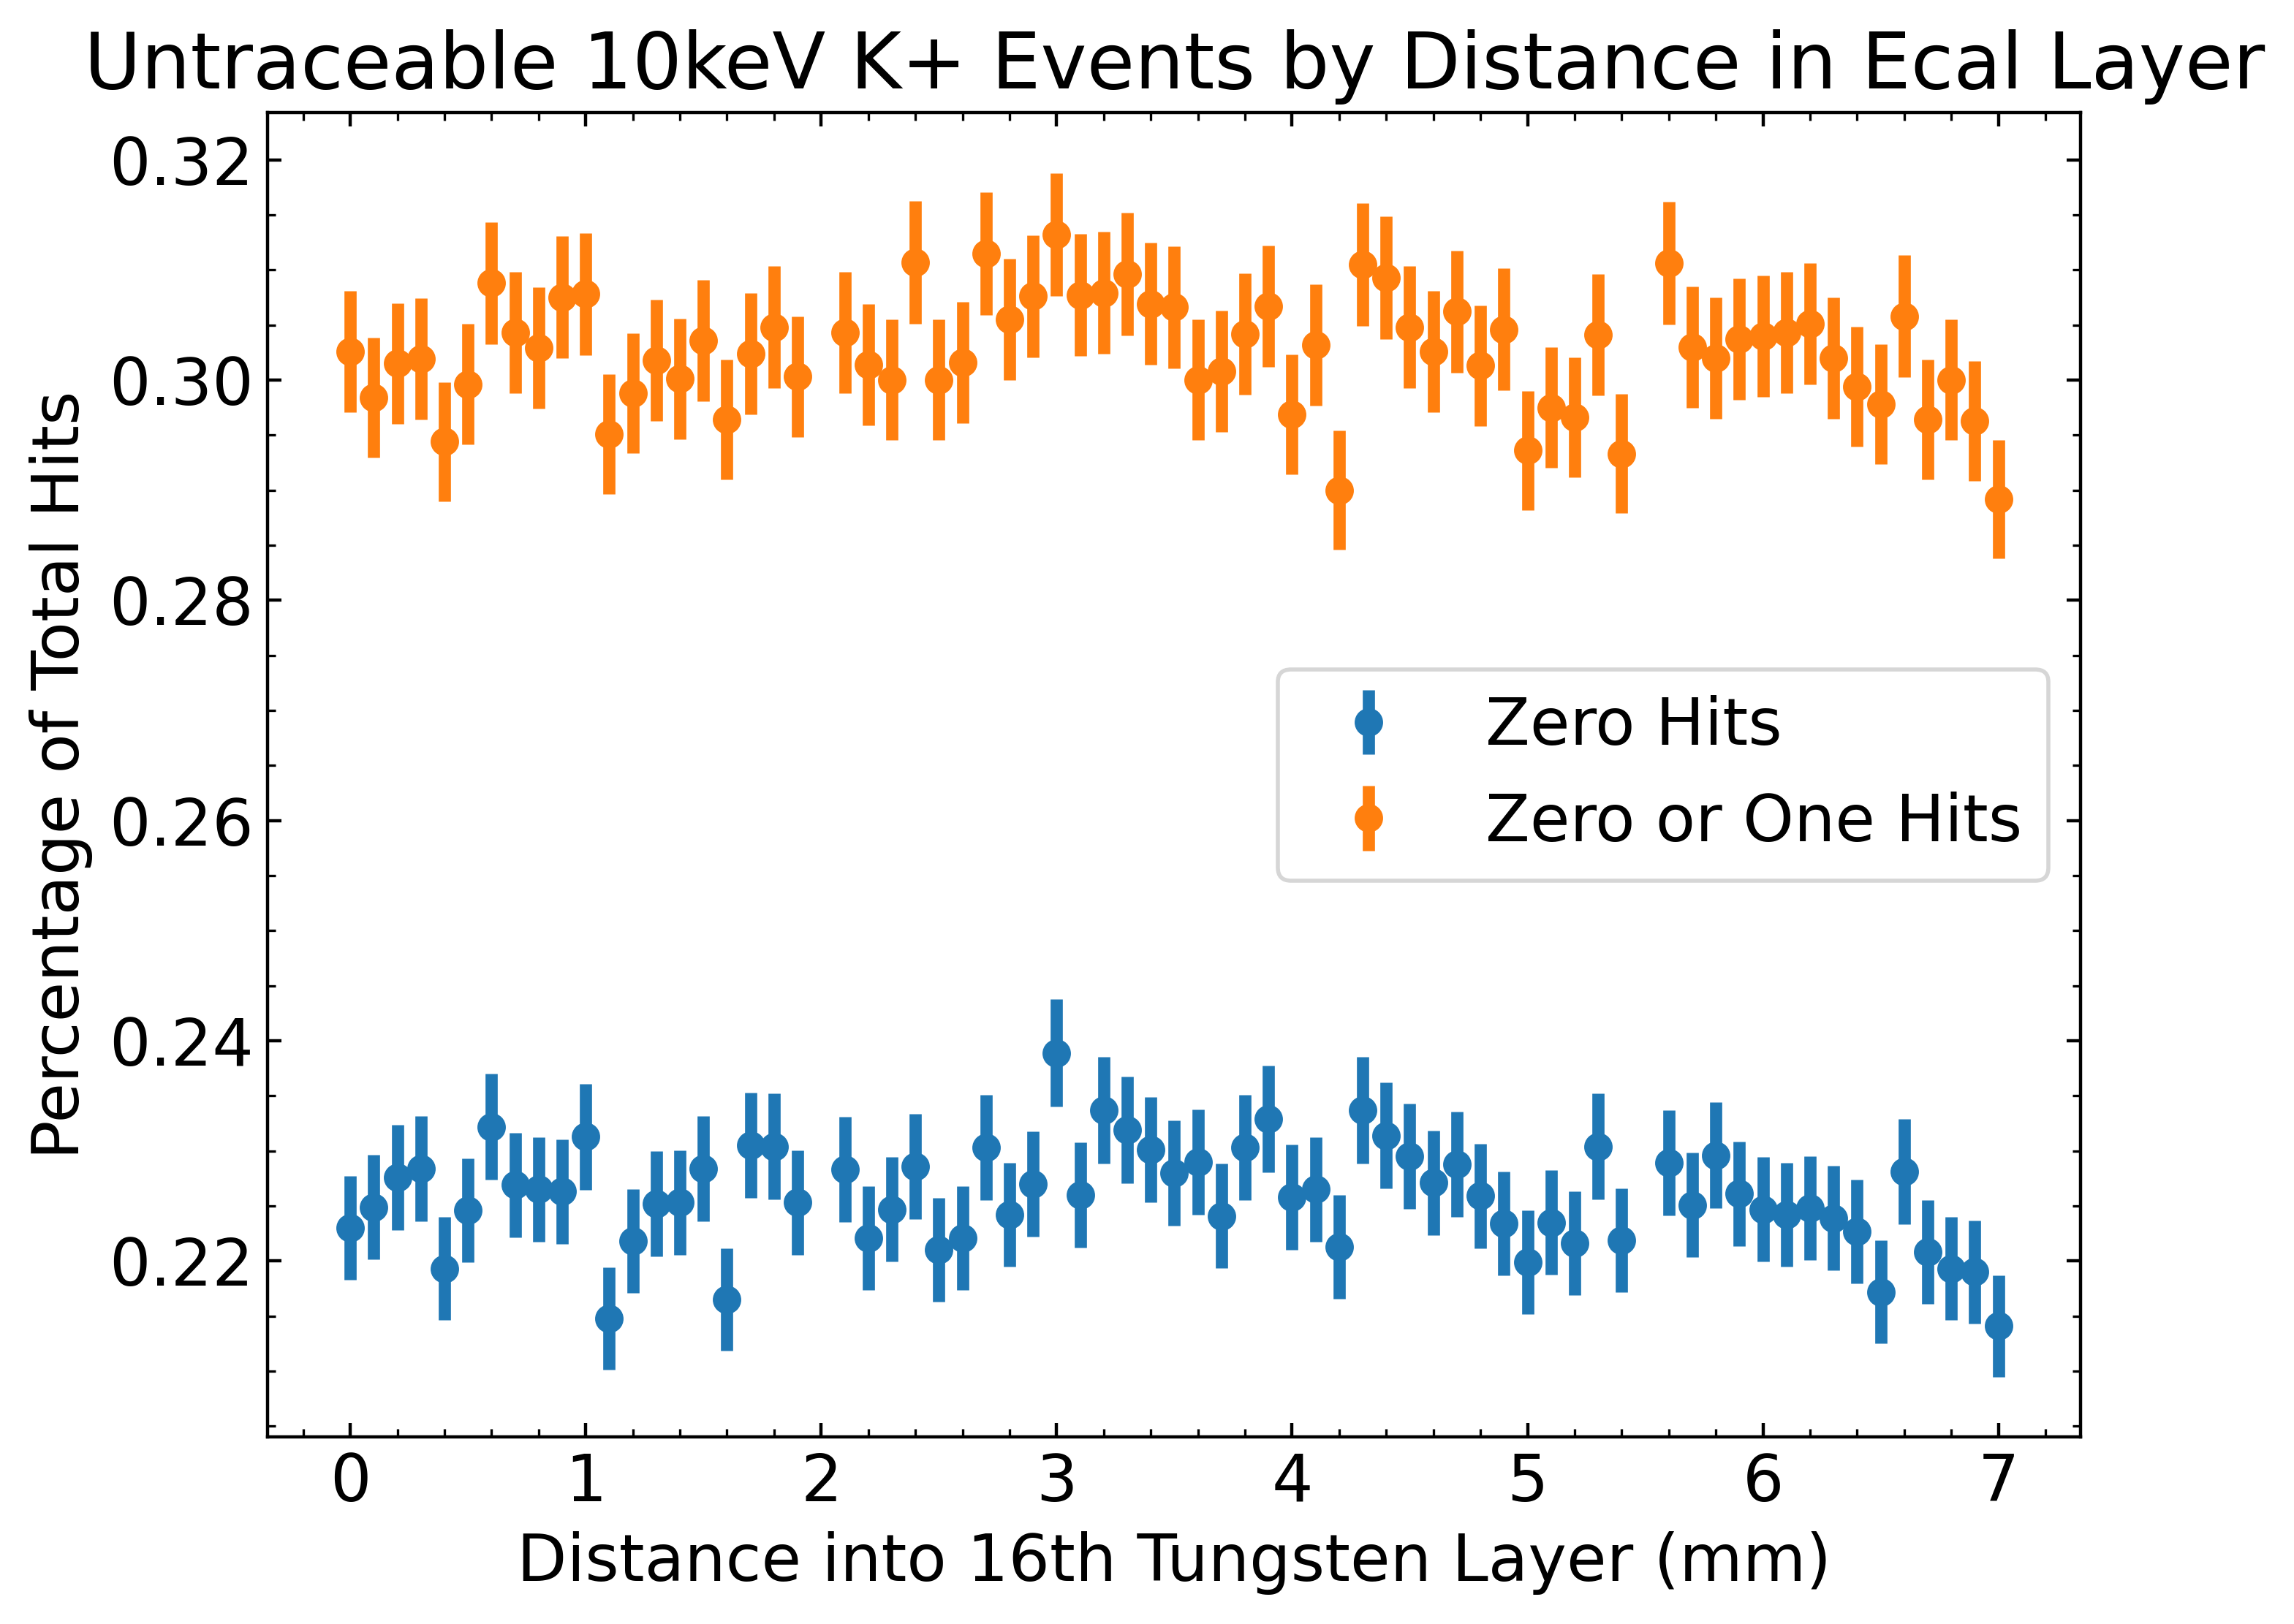

In [8]:
nohitsdata16 = np.genfromtxt('/Users/chris/Desktop/letsfigurethisout.txt',delimiter=',')
z16 = nohitsdata16[0:,0]
numzeros = nohitsdata16[0:,1]
numzeros_error = np.sqrt(numzeros)
numones = nohitsdata16[0:,2]
numones_error = np.sqrt(numones)
zfrom0 = z16 - z16[0]
perczero = numzeros/10000
percones = numones/10000
percnotracks = perczero + percones
percnotracks_err = np.sqrt(numzeros_error**2+numones_error**2)/10000


plt.figure(figsize=(8,6),dpi=400)
plt.errorbar(zfrom0,perczero,yerr=numzeros_error/10000,label='Zero Hits',linestyle='',marker='o')
plt.errorbar(zfrom0,percnotracks,yerr=percnotracks_err,label='Zero or One Hits',linestyle='',marker='o')
plt.xlabel("Distance into 16th Tungsten Layer (mm)")
plt.ylabel("Percentage of Total Hits")
plt.title("Untraceable 10keV K+ Events by Distance in Ecal Layer")
plt.legend()

In [11]:
print(numzeros_error/10000)

[0.00472229 0.00474236 0.00477074 0.00477912 0.00468295 0.0047392
 0.00481871 0.0047634  0.0047592  0.0047571  0.00480937 0.00463465
 0.00470956 0.00474552 0.00474658 0.00477912 0.00465296 0.00480104
 0.0048     0.00474658 0.00477807 0.00471275 0.00474025 0.00478121
 0.00470106 0.00471275 0.00479896 0.00473498 0.00476445 0.00488774
 0.00475395 0.00483425 0.0048156  0.00479687 0.00477493 0.00478539
 0.00473392 0.00479896 0.00482597 0.00475184 0.0047592  0.00470425
 0.00483425 0.00481041 0.00479062 0.0047655  0.0047833  0.00475289
 0.00472652 0.00468935 0.00472758 0.00470744 0.0048     0.00471063
 0.00478435 0.00474447 0.00479166 0.004755   0.00474025 0.00473498
 0.00474131 0.00473181 0.00471911 0.00466047 0.00477598 0.00469894
 0.00468295 0.00467974 0.00462709]
